In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [3]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [17]:
class LinearRegression(nn.Module):
    
    def __init__(self):
        super(LinearRegression , self).__init__()
        self.linear = nn.Linear(1,1) #1 input and 1 output
    
    def forward(self,x):
        out  = self.linear(x)
        return out 

In [18]:
model = LinearRegression()
# 定义loss和优化函数
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [19]:
optimizer 

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.0001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [24]:
epochs = 1000
for epoch in range(epochs):
    inputs = x_train
    target = y_train
    
    #forward
    out = model(inputs)
    loss = criterion(out , target)
    
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch) %50 ==0:
        print(f"epochs : {epoch}\nloss : {loss:.6f}")

epochs : 0
loss : 0.181695
epochs : 50
loss : 0.181662
epochs : 100
loss : 0.181630
epochs : 150
loss : 0.181597
epochs : 200
loss : 0.181565
epochs : 250
loss : 0.181532
epochs : 300
loss : 0.181500
epochs : 350
loss : 0.181468
epochs : 400
loss : 0.181435
epochs : 450
loss : 0.181403
epochs : 500
loss : 0.181371
epochs : 550
loss : 0.181339
epochs : 600
loss : 0.181307
epochs : 650
loss : 0.181276
epochs : 700
loss : 0.181244
epochs : 750
loss : 0.181212
epochs : 800
loss : 0.181181
epochs : 850
loss : 0.181149
epochs : 900
loss : 0.181118
epochs : 950
loss : 0.181087


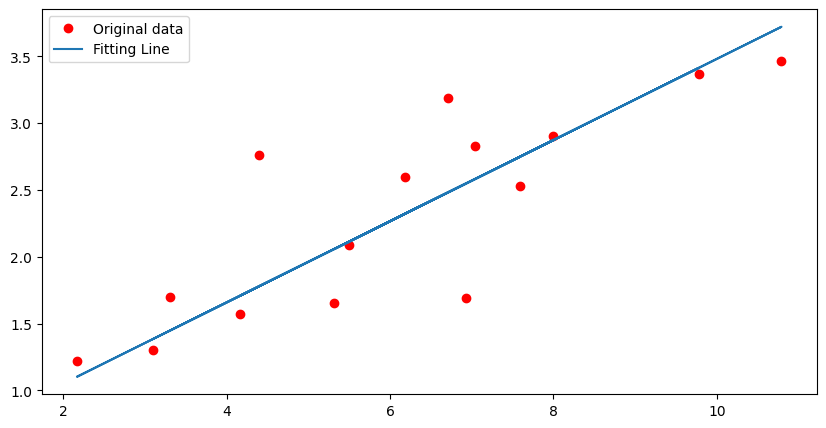

In [25]:
model.eval()
with torch.no_grad():
    predict = model(x_train)
predict = predict.data.numpy()

fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
plt.legend() 
plt.show()


torch.save(model.state_dict(), './linear.pth')